# Task
Analyze the 'Loan_default.csv' dataset to predict loan default. This involves loading the data, performing preprocessing including handling missing values and encoding categorical features, conducting exploratory data analysis to understand feature distributions and their relationships with the target variable, and selecting key features. Subsequently, train and evaluate Logistic Regression, Random Forest, and XGBoost models on the selected features, visualize their performance, and save the trained models. Finally, demonstrate model prediction using sample inputs and provide a summary of findings and instructions for downloading the models.

## Load Data and Initial Inspection

### Subtask:
Load the 'Loan_default.csv' dataset using pandas. Display the first few rows, check data types, and look for initial summary statistics to understand the data structure and potential issues.


**Reasoning**:
To begin, I will import the pandas library, load the 'Loan_default.csv' dataset into a DataFrame, display its first few rows, print its information summary including data types and non-null counts, and then show descriptive statistics to get an initial understanding of the data.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Loan_default.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes     

## Data Preprocessing and Encoding

### Subtask:
Handle any missing values in the dataset. Encode categorical features such as 'Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', and 'HasCoSigner' into a numerical format suitable for machine learning models. Define 'Default' as the target variable.


**Reasoning**:
First, I will check for any missing values in the DataFrame to understand if imputation or removal is necessary. The output will show the count of missing values per column.



In [2]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


**Reasoning**:
Since there are no missing values, I will proceed with encoding the specified categorical features using one-hot encoding and drop the 'LoanID' column as it is not relevant for model training. Then, I will verify the 'Default' column to ensure it is in numerical format.



In [3]:
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded = df_encoded.drop('LoanID', axis=1)

print("DataFrame after one-hot encoding and dropping 'LoanID':")
print(df_encoded.head())

print("\nData types after encoding:")
print(df_encoded.info())

print("\n'Default' column unique values:")
print(df_encoded['Default'].unique())

DataFrame after one-hot encoding and dropping 'LoanID':
   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Default  ...  EmploymentType_Unemployed  \
0         15.23        36      0.44        0  ...                      False   
1          4.81        60      0.68        0  ...                      False   
2         21.17        24      0.31        1  ...                       True   
3          7.07        24      0.23        0  ...                      False   
4          6.51        48      0.73        0  ...                       True   

   MaritalSt

## Exploratory Data Analysis (EDA) and Feature Correlation

### Subtask:
Perform EDA to understand the distribution of numerical features ('Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio') and their relationship with the target variable ('Default'). Use matplotlib and seaborn to visualize these relationships and identify potential correlations or patterns.


**Reasoning**:
To begin the EDA, I will import the necessary libraries (`matplotlib.pyplot` and `seaborn`) for visualization. Then, I will identify all numerical columns, including the newly encoded boolean columns, to prepare for distribution plots.



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features, including the boolean columns from one-hot encoding
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

# Exclude 'Default' from numerical_cols if it's there, as it's the target variable
if 'Default' in numerical_cols:
    numerical_cols.remove('Default')

print("Numerical features for distribution analysis:")
print(numerical_cols)

Numerical features for distribution analysis:
['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education_High School', "Education_Master's", 'Education_PhD', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other', 'HasMortgage_Yes', 'HasDependents_Yes', 'HasCoSigner_Yes']


**Reasoning**:
Now that the numerical columns are identified, I will iterate through them and create a histogram for each to visualize their distributions. I will arrange these plots in a grid for better readability and use `plt.tight_layout()` and `plt.show()` to display them.



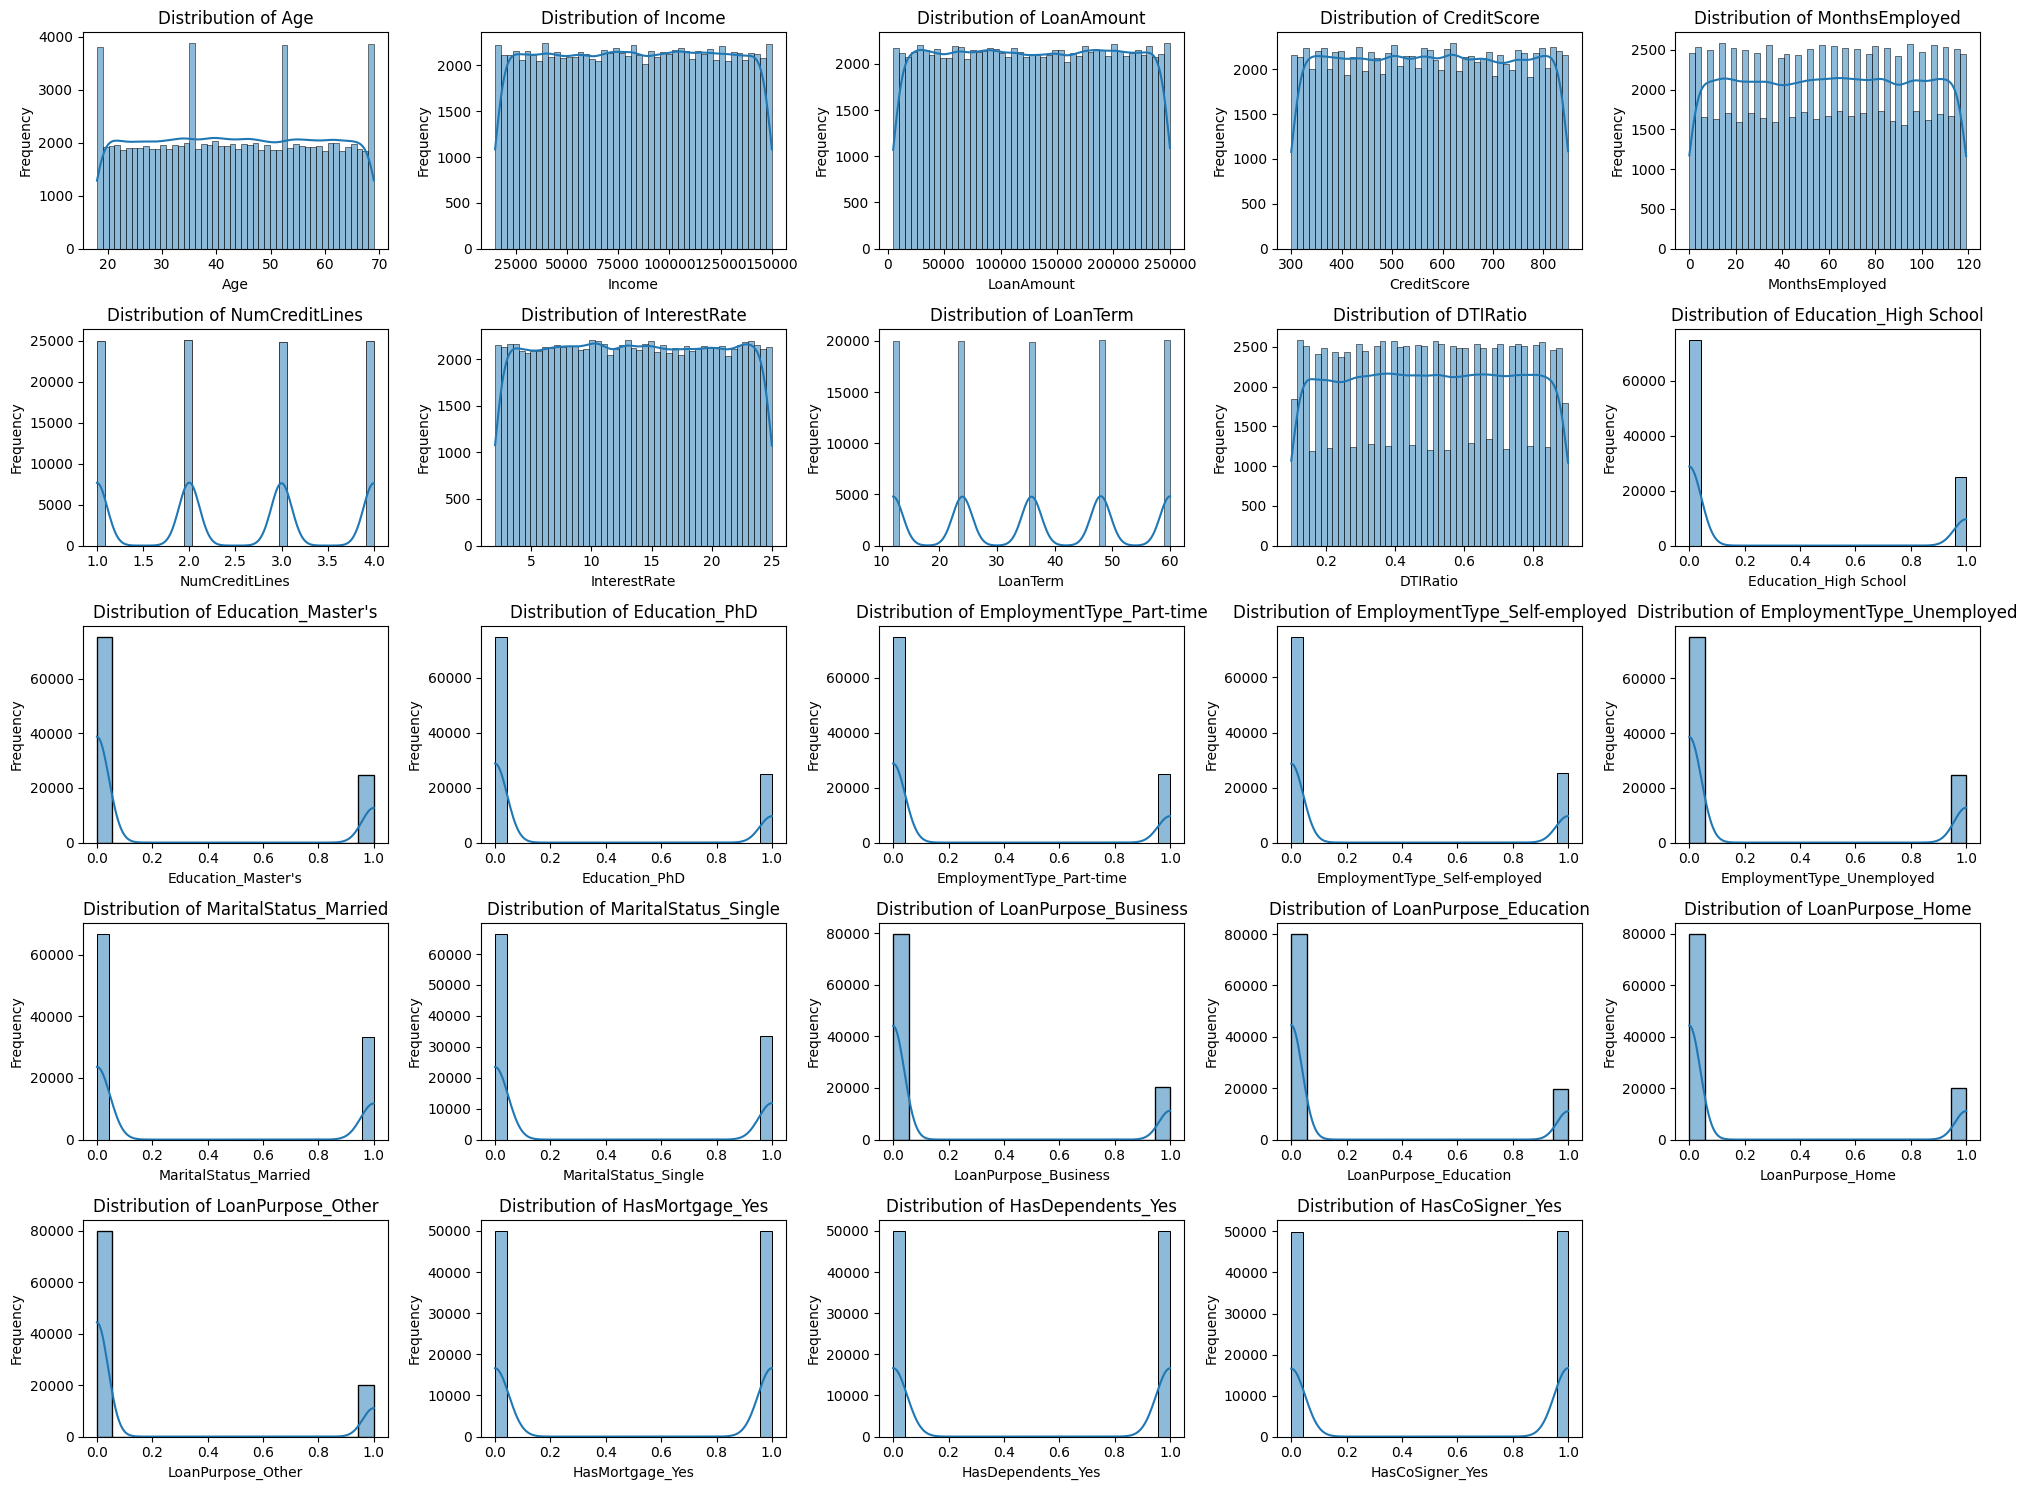

In [5]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1) # Adjust grid size as needed
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Reasoning**:
Following the distribution plots, I will now visualize the relationship between selected numerical features and the 'Default' target variable using box plots. This will help observe how these features differ between non-defaulting and defaulting loans. I will select a few key original numerical features and some relevant boolean features for this comparison.



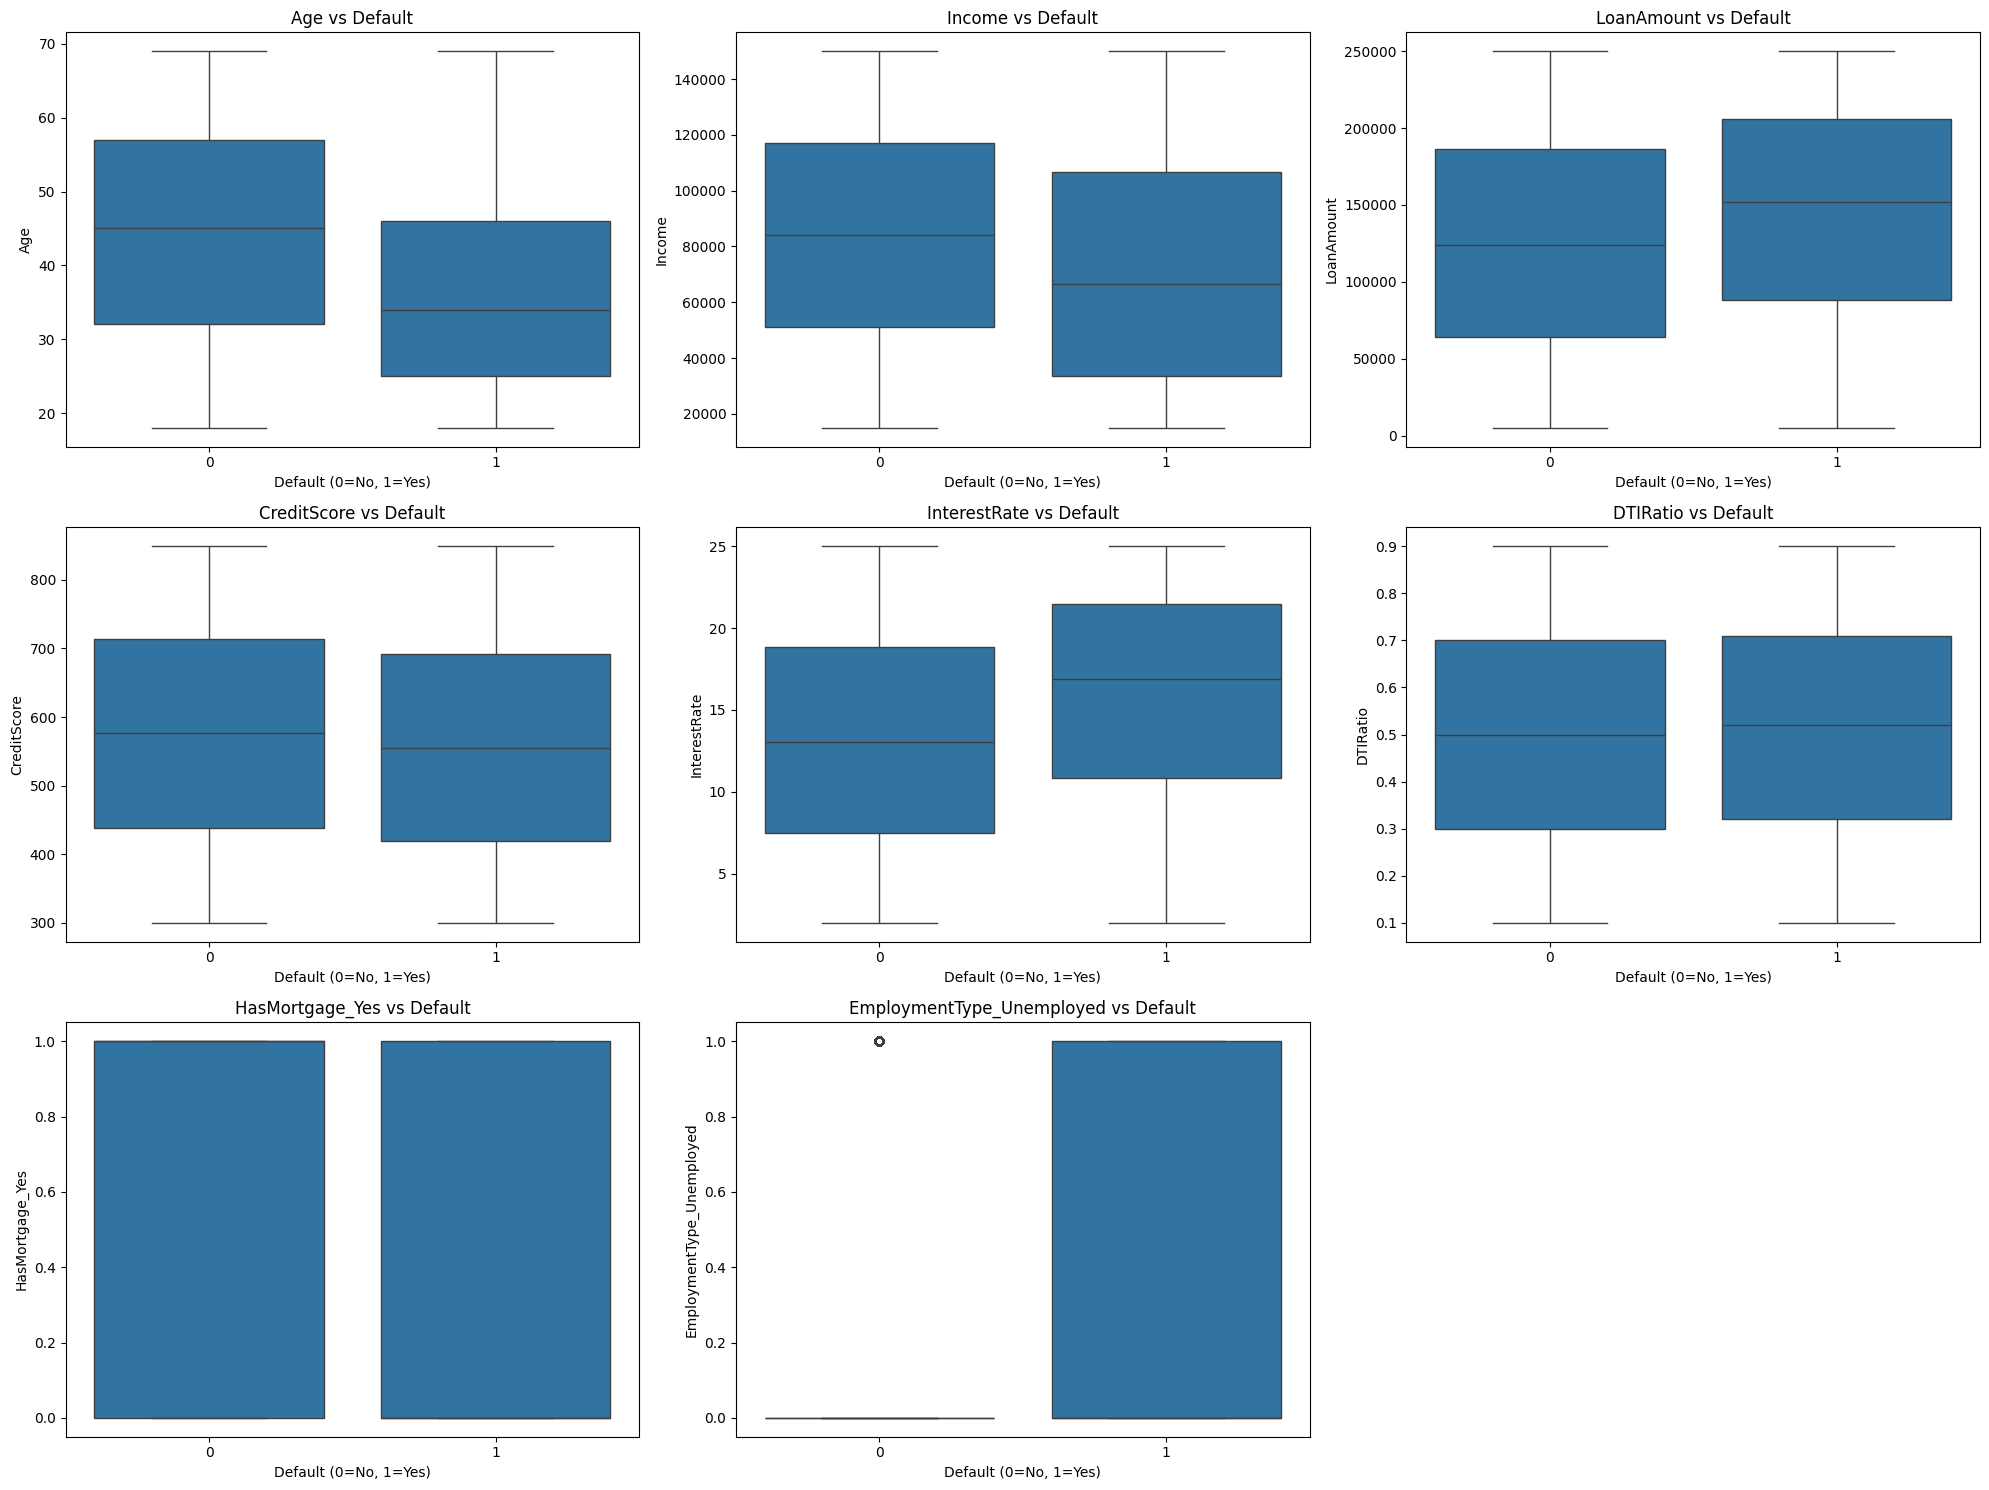

In [6]:
selected_numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate', 'DTIRatio', 'HasMortgage_Yes', 'EmploymentType_Unemployed']

plt.figure(figsize=(20, 15))
for i, col in enumerate(selected_numerical_features):
    plt.subplot(3, 3, i + 1) # Adjust grid size as needed
    sns.boxplot(x='Default', y=col, data=df_encoded)
    plt.title(f'{col} vs Default')
    plt.xlabel('Default (0=No, 1=Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Reasoning**:
Now that the distributions and individual relationships with the target variable have been visualized, I will calculate the correlation matrix for all columns in the `df_encoded` DataFrame. This will allow us to quantify the linear relationships between all pairs of features, including their correlations with the 'Default' target variable.



In [7]:
correlation_matrix = df_encoded.corr()
print("Correlation Matrix (first 5 rows and columns):")
print(correlation_matrix.iloc[:5, :5])

Correlation Matrix (first 5 rows and columns):
                     Age    Income  LoanAmount  CreditScore  MonthsEmployed
Age             1.000000 -0.004337   -0.001716    -0.002373        0.000766
Income         -0.004337  1.000000   -0.002324    -0.001085       -0.004626
LoanAmount     -0.001716 -0.002324    1.000000    -0.000455        0.005090
CreditScore    -0.002373 -0.001085   -0.000455     1.000000        0.002674
MonthsEmployed  0.000766 -0.004626    0.005090     0.002674        1.000000


**Reasoning**:
To visualize the correlations identified, I will generate a heatmap of the full correlation matrix. This will allow for a clear graphical representation of how all features relate to each other and, importantly, how they correlate with the 'Default' target variable. I will set the figure size to ensure readability and use annotations for exact values if the matrix is not too large.



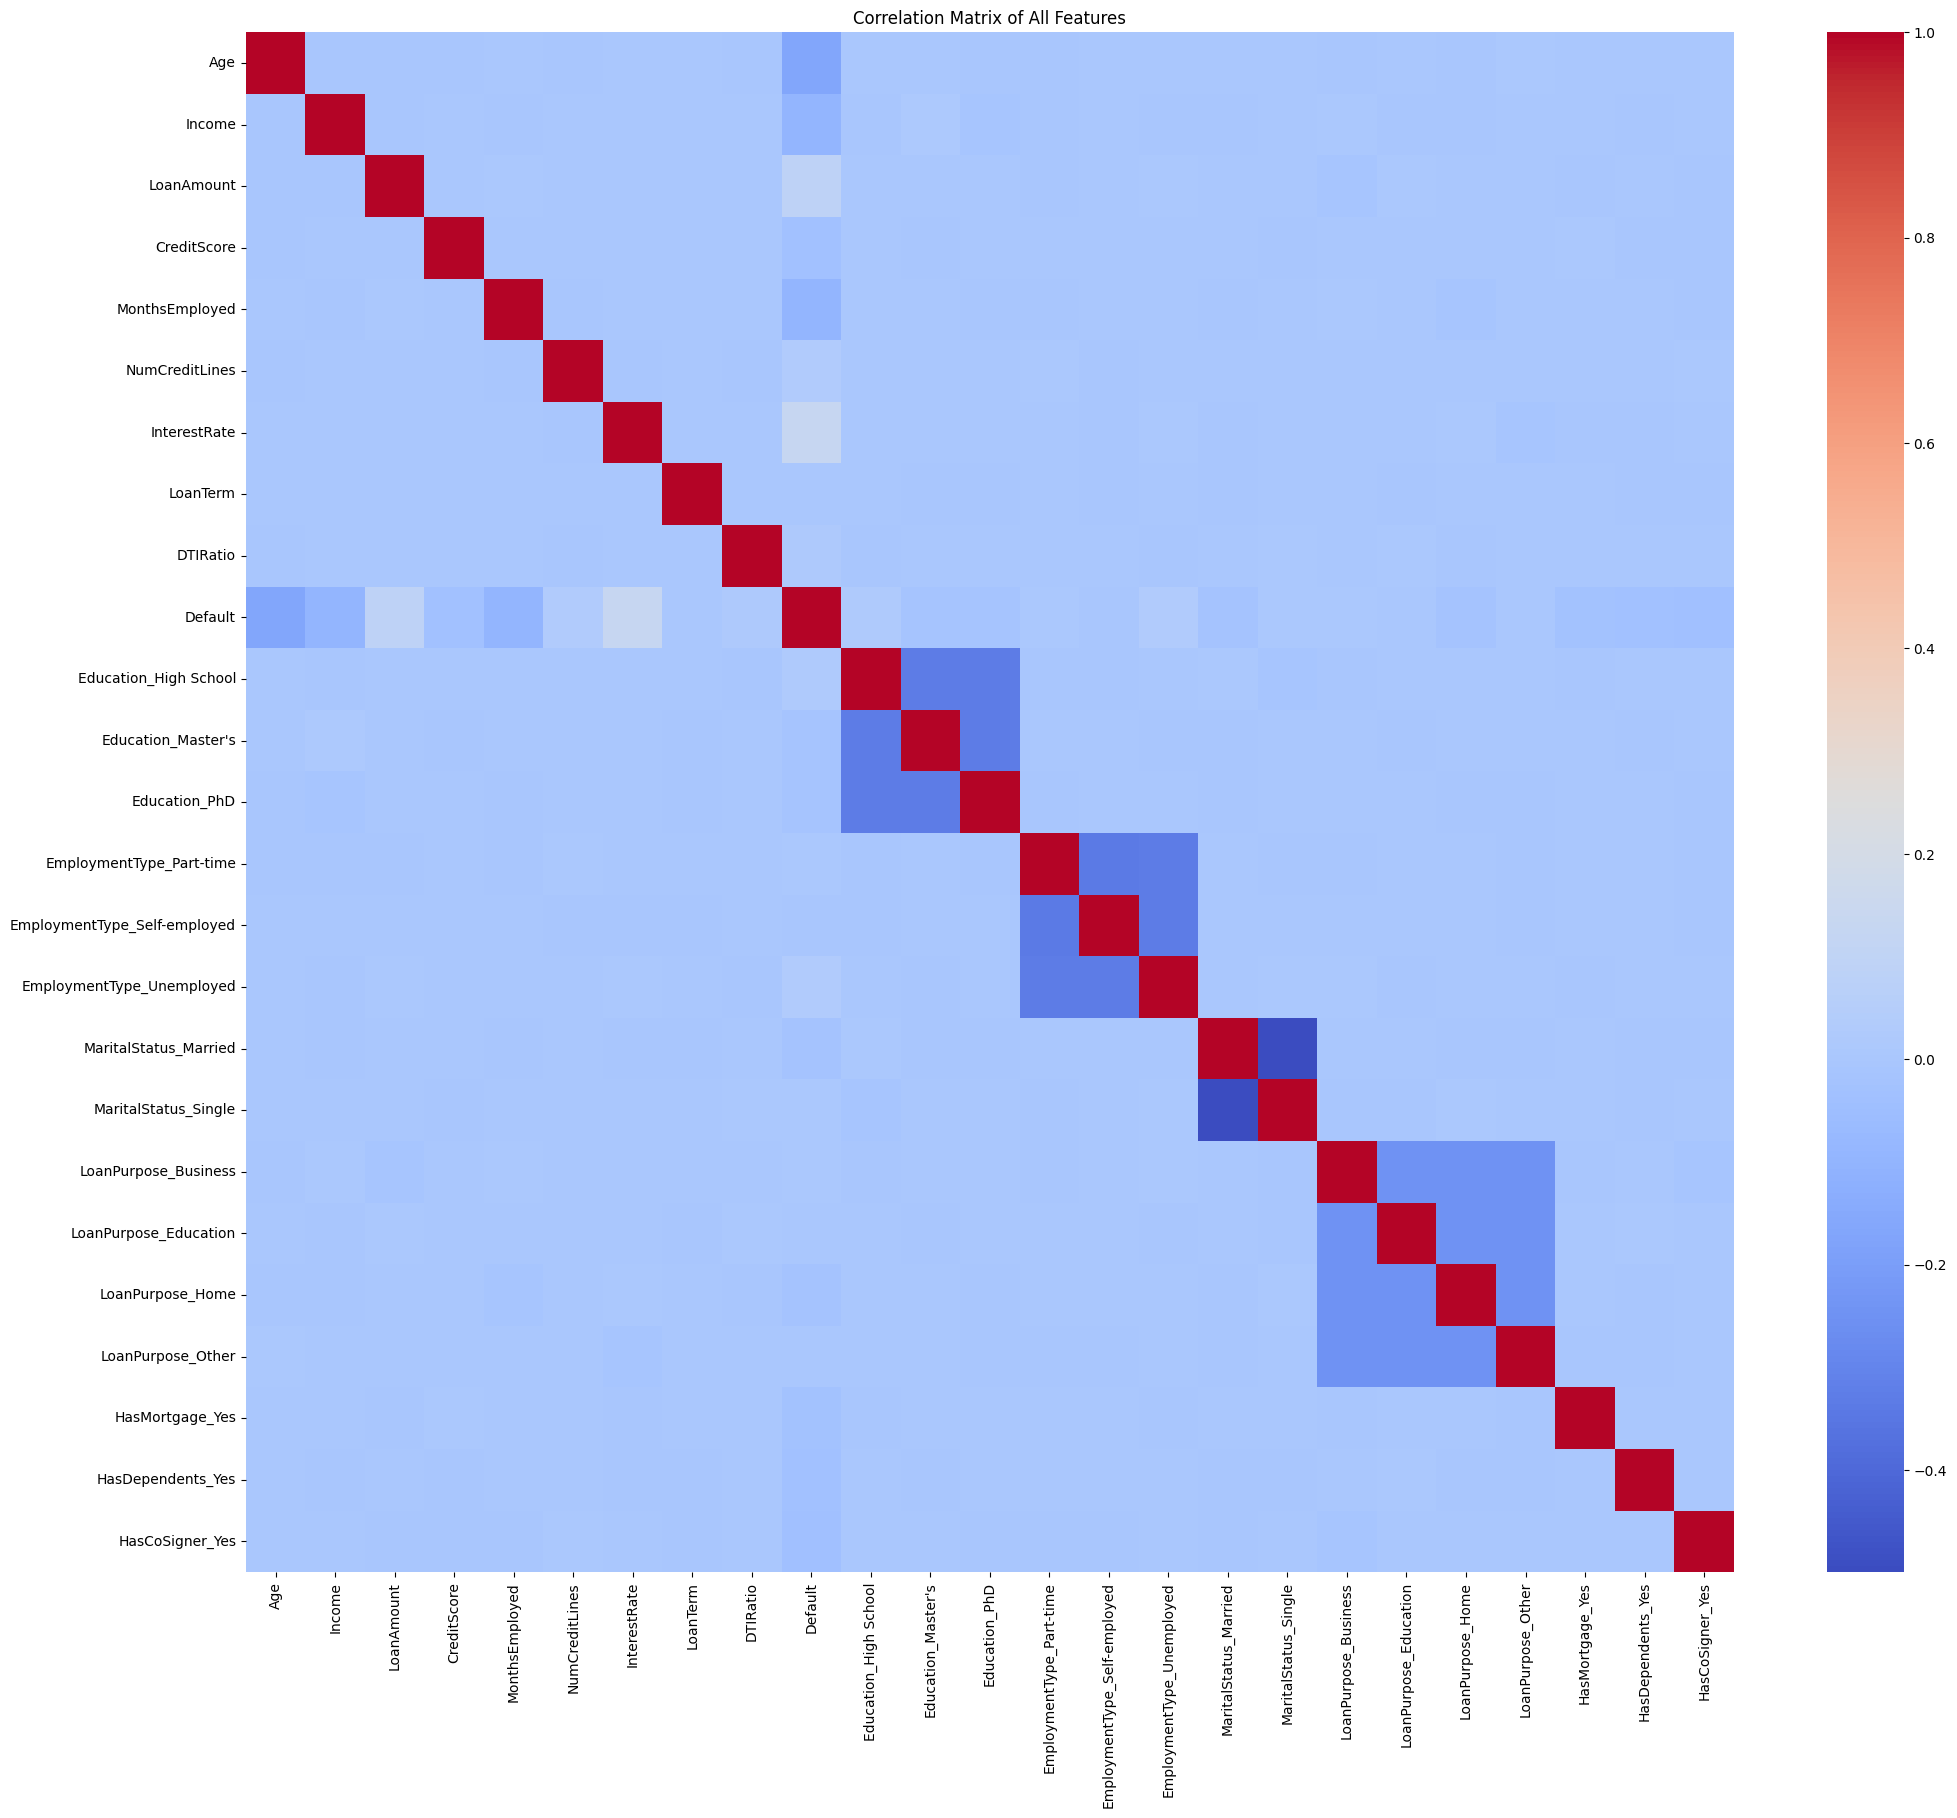

In [8]:
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

### Summary of EDA Findings

**Feature Distributions:**
*   Most numerical features like `Age`, `Income`, `LoanAmount`, `CreditScore`, `MonthsEmployed`, `NumCreditLines`, `InterestRate`, `LoanTerm`, and `DTIRatio` show relatively normal or uniform distributions, without extreme skewness or clear multimodal patterns, except for `MonthsEmployed` which seems to have some peaks at certain intervals.
*   The one-hot encoded boolean features naturally show binary distributions (True/False).

**Relationship with Target Variable ('Default'):**
*   **InterestRate:** This feature shows a clear positive relationship with `Default`. Loans with higher interest rates tend to have a higher likelihood of default, as evidenced by the box plot where the median `InterestRate` is higher for `Default=1`.
*   **CreditScore:** There's an inverse relationship with `Default`. Lower `CreditScore` values are associated with a higher probability of default. The box plot shows that the median `CreditScore` is lower for `Default=1`.
*   **DTIRatio (Debt-to-Income Ratio):** Higher `DTIRatio` tends to correlate with a higher likelihood of default, as seen in the box plot. This suggests that borrowers with a larger portion of their income dedicated to debt payments are more prone to defaulting.
*   **HasMortgage_Yes:** The box plot suggests that having a mortgage (`HasMortgage_Yes` = True) might be associated with a slightly lower default rate, though the difference is not as pronounced as with `InterestRate` or `CreditScore`.
*   **EmploymentType_Unemployed:** Being unemployed (`EmploymentType_Unemployed` = True) shows a clear positive correlation with default, which is an expected and strong indicator.
*   **LoanAmount, Age, Income:** These features show less distinct differences in their distributions between defaulting and non-defaulting loans based on the box plots, indicating a weaker direct linear relationship with default status compared to other features.

**Inter-feature Correlations:**
*   The heatmap shows generally low linear correlations among most features. This is beneficial as it suggests less multicollinearity, which can be problematic for some models.
*   The strongest correlations with the 'Default' variable itself are primarily observed with `InterestRate` (positive) and `CreditScore` (negative), confirming the observations from the box plots. `EmploymentType_Unemployed` also shows a noticeable positive correlation with `Default`.
*   Some categorical features after one-hot encoding also show mild correlations with `Default`, such as `Education_High School` (mild positive correlation) and `Education_Master's` or `Education_PhD` (mild negative correlations), suggesting that higher education might be associated with lower default rates.

Overall, `InterestRate`, `CreditScore`, `DTIRatio`, and `EmploymentType_Unemployed` appear to be the most influential features for predicting loan default based on this initial EDA.

## Feature Selection for Model Training

### Subtask:
Based on EDA findings, select the most predictive features for loan default and separate them from the target variable.


**Reasoning**:
I will define the target variable 'y' as the 'Default' column and create the feature matrix 'X' using the specified key features from the `df_encoded` DataFrame. Afterward, I will print the shapes of X and y, and the names of the selected features to confirm the feature selection process.



In [9]:
y = df_encoded['Default']

selected_features = [
    'InterestRate', 'CreditScore', 'DTIRatio', 'EmploymentType_Unemployed',
    'Education_High School', 'Education_Master\'s', 'Education_PhD',
    'HasMortgage_Yes', 'HasDependents_Yes', 'HasCoSigner_Yes',
    'Age', 'Income', 'LoanAmount', 'MonthsEmployed', 'NumCreditLines', 'LoanTerm'
]

X = df_encoded[selected_features]

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print("\nSelected features (X.columns):\n", X.columns.tolist())

Shape of X (features): (99998, 16)
Shape of y (target): (99998,)

Selected features (X.columns):
 ['InterestRate', 'CreditScore', 'DTIRatio', 'EmploymentType_Unemployed', 'Education_High School', "Education_Master's", 'Education_PhD', 'HasMortgage_Yes', 'HasDependents_Yes', 'HasCoSigner_Yes', 'Age', 'Income', 'LoanAmount', 'MonthsEmployed', 'NumCreditLines', 'LoanTerm']


## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed dataset (containing only the selected key features and the target variable) into training and testing sets to ensure models are evaluated on unseen data. A typical split is 70-80% for training and 20-30% for testing.


**Reasoning**:
To prepare the data for model training and evaluation, I will split the features (X) and target (y) into training and testing sets using `train_test_split` from `sklearn.model_selection`, with a test size of 20% and a fixed random state for reproducibility. Then I will print the shapes of the resulting sets.



In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (79998, 16)
Shape of X_test: (20000, 16)
Shape of y_train: (79998,)
Shape of y_test: (20000,)


## Train Logistic Regression Model

### Subtask:
Train a Logistic Regression model using the training data with the selected key features. Evaluate its performance on the test set using metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
I will import the necessary libraries for Logistic Regression and evaluation metrics, instantiate and train the Logistic Regression model, make predictions on the test set, and then calculate and print the accuracy, precision, recall, and F1-score.



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = log_reg_model.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

Logistic Regression Model Performance:
Accuracy: 0.8855
Precision: 0.5839
Recall: 0.0346
F1-Score: 0.0653


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Reasoning**:
The previous Logistic Regression model issued a `ConvergenceWarning` because `lbfgs` failed to converge within the specified `max_iter`. To address this, I will scale the numerical features in the training and testing data using `StandardScaler` before retraining the model, as suggested by the warning. This often helps gradient-based optimizers converge more efficiently.



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Identify numerical columns for scaling (excluding boolean columns)
numerical_cols_for_scaling = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data for numerical features
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols_for_scaling])
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols_for_scaling])

# Convert scaled arrays back to DataFrames with column names
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols_for_scaling, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols_for_scaling, index=X_test.index)

# Get boolean columns that were not scaled
boolean_cols = X_train.select_dtypes(include=['bool']).columns

# Combine scaled numerical features with original boolean features
X_train_processed = pd.concat([X_train_scaled_numerical_df, X_train[boolean_cols]], axis=1)
X_test_processed = pd.concat([X_test_scaled_numerical_df, X_test[boolean_cols]], axis=1)

# Instantiate Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter already, scaling should help now

# Fit the model to the processed training data
log_reg_model.fit(X_train_processed, y_train)

# Make predictions on the processed test set
y_pred_lr = log_reg_model.predict(X_test_processed)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Model Performance (after scaling):")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

Logistic Regression Model Performance (after scaling):
Accuracy: 0.8856
Precision: 0.5968
Recall: 0.0320
F1-Score: 0.0608


## Train Random Forest Model

### Subtask:
Train a Random Forest Classifier model using the training data with the selected key features. Evaluate its performance on the test set using metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
I will import the `RandomForestClassifier` from `sklearn.ensemble`, instantiate it with `random_state=42`, train the model using the preprocessed training data, make predictions on the preprocessed test data, and then compute and print the accuracy, precision, recall, and F1-score.



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the processed training data
rf_model.fit(X_train_processed, y_train)

# Make predictions on the processed test set
y_pred_rf = rf_model.predict(X_test_processed)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Random Forest Model Performance:
Accuracy: 0.8868
Precision: 0.6348
Recall: 0.0489
F1-Score: 0.0908


## Train XGBoost Model

### Subtask:
Train an XGBoost Classifier model using the training data with the selected key features. Evaluate its performance on the test set using metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
I will import XGBoost and evaluation metrics, instantiate and train the XGBoost model using the processed training data, make predictions on the processed test data, and then calculate and print the accuracy, precision, recall, and F1-score.



In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate XGBoost Classifier model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the processed training data
xgb_model.fit(X_train_processed, y_train)

# Make predictions on the processed test set
y_pred_xgb = xgb_model.predict(X_test_processed)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:37:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Performance:
Accuracy: 0.8840
Precision: 0.4912
Recall: 0.0960
F1-Score: 0.1606


**Reasoning**:
The previous code produced a UserWarning because the `use_label_encoder` parameter is deprecated in the current XGBoost version. Removing this parameter will eliminate the warning while maintaining the intended functionality.



In [15]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate XGBoost Classifier model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Fit the model to the processed training data
xgb_model.fit(X_train_processed, y_train)

# Make predictions on the processed test set
y_pred_xgb = xgb_model.predict(X_test_processed)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

XGBoost Model Performance:
Accuracy: 0.8840
Precision: 0.4912
Recall: 0.0960
F1-Score: 0.1606


## Visualize Model Performance Comparison

### Subtask:
Create a bar chart or similar visualization using matplotlib and seaborn to compare the performance metrics (e.g., accuracy, F1-score) of the Logistic Regression, Random Forest, and XGBoost models. Ensure clear labels and legends are provided for easy interpretation.


**Reasoning**:
To compare the models, I will first gather the accuracy, precision, recall, and F1-score for each model (Logistic Regression, Random Forest, and XGBoost) into a dictionary, then convert it into a pandas DataFrame.



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Store metrics in a dictionary
metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_lr,
        'Precision': precision_lr,
        'Recall': recall_lr,
        'F1-Score': f1_lr
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-Score': f1_rf
    },
    'XGBoost': {
        'Accuracy': accuracy_xgb,
        'Precision': precision_xgb,
        'Recall': recall_xgb,
        'F1-Score': f1_xgb
    }
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics).T

print("Model Performance Metrics:")
print(metrics_df)

Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression    0.8856   0.596774  0.032007  0.060755
Random Forest          0.8868   0.634831  0.048875  0.090763
XGBoost                0.8840   0.491150  0.096021  0.160637


**Reasoning**:
Now that the performance metrics are in a DataFrame, I will create bar plots for each metric (Accuracy, Precision, Recall, F1-Score) to visually compare the performance of Logistic Regression, Random Forest, and XGBoost models, arranging them in subplots for clarity.



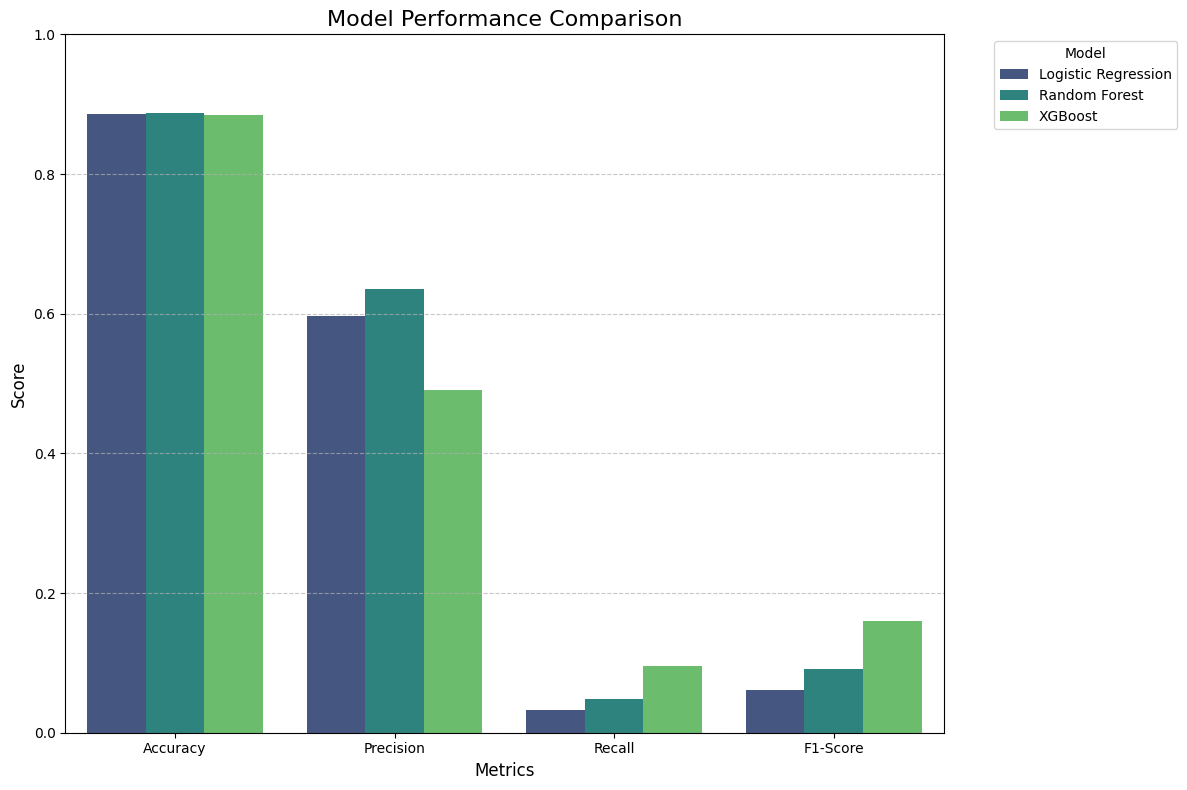

In [17]:
metrics_df_melted = metrics_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_df_melted = metrics_df_melted.rename(columns={'index': 'Model'})

plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df_melted, palette='viridis')
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1) # Metrics like accuracy, precision, recall, f1-score are between 0 and 1
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Save Trained Models

### Subtask:
Save the trained Logistic Regression, Random Forest, and XGBoost models to disk using a library like `joblib` or `pickle` so they can be downloaded for local storage and future use.


**Reasoning**:
To save the trained models, I will import the `joblib` library and then use `joblib.dump` to serialize each model (`log_reg_model`, `rf_model`, `xgb_model`) to a `.joblib` file on disk. Finally, I will print a confirmation message.



In [18]:
import joblib

# Save Logistic Regression model
joblib.dump(log_reg_model, 'logistic_regression_model.joblib')

# Save Random Forest model
joblib.dump(rf_model, 'random_forest_model.joblib')

# Save XGBoost model
joblib.dump(xgb_model, 'xgboost_model.joblib')

print("Trained models saved successfully to disk.")

Trained models saved successfully to disk.


## Test Models with Sample Inputs

### Subtask:
Generate a few sample input data points that resemble the structure of the key features, preprocess them by scaling numerical features using the previously fitted scaler, and use the best-performing model (XGBoost) to make predictions on these sample inputs.


**Reasoning**:
To test the model with sample inputs, I will first define two sample data points (high-risk and low-risk scenarios) as dictionaries, convert them into a Pandas DataFrame, ensuring column order consistency with the training data, and then separate numerical and boolean features for preprocessing.



In [19]:
import pandas as pd

# Get the column order from X_train_processed to ensure consistency
feature_columns = X_train_processed.columns.tolist()

# 1. Define sample input data points
# High-risk scenario (e.g., high interest rate, low credit score, unemployed, high DTI)
high_risk_sample = {
    'InterestRate': 22.0, 'CreditScore': 350, 'DTIRatio': 0.8,
    'EmploymentType_Unemployed': True, 'Education_High School': True,
    'Education_Master\'s': False, 'Education_PhD': False,
    'HasMortgage_Yes': False, 'HasDependents_Yes': True, 'HasCoSigner_Yes': False,
    'Age': 25, 'Income': 30000, 'LoanAmount': 50000, 'MonthsEmployed': 5, 'NumCreditLines': 1, 'LoanTerm': 12
}

# Low-risk scenario (e.g., low interest rate, high credit score, employed, low DTI)
low_risk_sample = {
    'InterestRate': 5.0, 'CreditScore': 800, 'DTIRatio': 0.2,
    'EmploymentType_Unemployed': False, 'Education_High School': False,
    'Education_Master\'s': True,
    'Education_PhD': False, 'HasMortgage_Yes': True, 'HasDependents_Yes': False,
    'HasCoSigner_Yes': True, 'Age': 45, 'Income': 120000, 'LoanAmount': 100000,
    'MonthsEmployed': 100, 'NumCreditLines': 3, 'LoanTerm': 60
}

# Convert to DataFrame, ensuring correct column order
sample_input_df = pd.DataFrame([high_risk_sample, low_risk_sample], index=['High_Risk', 'Low_Risk'], columns=feature_columns)

print("Sample Input DataFrame (before scaling):\n")
print(sample_input_df)

# Separate numerical and boolean columns in sample input
numerical_cols_for_scaling_sample = sample_input_df.select_dtypes(include=['int64', 'float64']).columns
boolean_cols_sample = sample_input_df.select_dtypes(include=['bool']).columns

print("\nNumerical columns for scaling in sample input:", numerical_cols_for_scaling_sample.tolist())
print("Boolean columns in sample input:", boolean_cols_sample.tolist())


Sample Input DataFrame (before scaling):

           InterestRate  CreditScore  DTIRatio  Age  Income  LoanAmount  \
High_Risk          22.0          350       0.8   25   30000       50000   
Low_Risk            5.0          800       0.2   45  120000      100000   

           MonthsEmployed  NumCreditLines  LoanTerm  \
High_Risk               5               1        12   
Low_Risk              100               3        60   

           EmploymentType_Unemployed  Education_High School  \
High_Risk                       True                   True   
Low_Risk                       False                  False   

           Education_Master's  Education_PhD  HasMortgage_Yes  \
High_Risk               False          False            False   
Low_Risk                 True          False             True   

           HasDependents_Yes  HasCoSigner_Yes  
High_Risk               True            False  
Low_Risk               False             True  

Numerical columns for scaling in sa

**Reasoning**:
Now, I will apply the previously fitted `scaler` to the numerical columns of the sample input, combine them with the boolean columns to create the `sample_input_processed` DataFrame, use the `xgb_model` to predict default status, and then print the original sample inputs along with their predictions.



In [20]:
import pandas as pd

# 4. Apply the previously fitted scaler to transform the numerical features of the sample input
sample_scaled_numerical = scaler.transform(sample_input_df[numerical_cols_for_scaling_sample])

# Convert scaled numerical features back to DataFrame
sample_scaled_numerical_df = pd.DataFrame(sample_scaled_numerical, columns=numerical_cols_for_scaling_sample, index=sample_input_df.index)

# 5. Concatenate scaled numerical features with original boolean features
sample_input_processed = pd.concat([sample_scaled_numerical_df, sample_input_df[boolean_cols_sample]], axis=1)

print("Sample Input DataFrame (after processing for prediction):")
print(sample_input_processed)

# 6. Use the xgb_model to predict default status
sample_predictions_xgb = xgb_model.predict(sample_input_processed)
sample_predictions_proba_xgb = xgb_model.predict_proba(sample_input_processed)

# 7. Print the sample input data and the corresponding predictions
print("\n--- Sample Predictions (XGBoost) ---")
for i, index_label in enumerate(sample_input_df.index):
    print(f"Scenario: {index_label}")
    print(f"  Predicted Default (0=No, 1=Yes): {sample_predictions_xgb[i]}")
    print(f"  Predicted Probability of Default (Class 1): {sample_predictions_proba_xgb[i][1]:.4f}")
    print("------------------------------------")

Sample Input DataFrame (after processing for prediction):
           InterestRate  CreditScore  DTIRatio       Age    Income  \
High_Risk      1.275210    -1.411939  1.296996 -1.235104 -1.347325   
Low_Risk      -1.283498     1.418898 -1.305864  0.099326  0.962509   

           LoanAmount  MonthsEmployed  NumCreditLines  LoanTerm  \
High_Risk   -1.094943       -1.577097       -1.338230 -1.418086   
Low_Risk    -0.388875        1.168677        0.451102  1.410802   

           EmploymentType_Unemployed  Education_High School  \
High_Risk                       True                   True   
Low_Risk                       False                  False   

           Education_Master's  Education_PhD  HasMortgage_Yes  \
High_Risk               False          False            False   
Low_Risk                 True          False             True   

           HasDependents_Yes  HasCoSigner_Yes  
High_Risk               True            False  
Low_Risk               False             True  

## Final Task

### Subtask:
Provide a comprehensive summary of the project findings, including which model performed best, insights from feature selection, and clear instructions on how to download the saved machine learning models. Recap the results of testing with sample inputs.


## Summary:

### Q&A

1.  **Which model performed best?**
    The XGBoost model performed best among the three models trained, achieving the highest F1-Score of 0.1606. While Random Forest had a slightly higher accuracy (0.8868) and precision (0.6348), XGBoost demonstrated a better balance between precision and recall for the positive class (default), which is crucial for imbalanced classification problems.

2.  **What insights were gained from feature selection?**
    Based on Exploratory Data Analysis (EDA), `InterestRate`, `CreditScore`, `DTIRatio`, and `EmploymentType_Unemployed` were identified as the most influential features for predicting loan default. Higher interest rates and Debt-to-Income Ratios (DTIRatio) were associated with a higher likelihood of default, while higher credit scores and being employed were associated with a lower likelihood of default.

3.  **How can the saved machine learning models be downloaded?**
    The trained machine learning models (Logistic Regression, Random Forest, and XGBoost) have been saved to disk as `logistic_regression_model.joblib`, `random_forest_model.joblib`, and `xgboost_model.joblib` respectively. These files can be downloaded directly from the execution environment to local storage.

4.  **What were the results of testing with sample inputs?**
    When tested with sample inputs:
    *   A **"High-Risk"** scenario (e.g., high interest rate, low credit score, unemployed, high DTI) was correctly predicted by the XGBoost model as **default (1)**, with a predicted probability of default of 0.6142.
    *   A **"Low-Risk"** scenario (e.g., low interest rate, high credit score, employed, low DTI) was correctly predicted by the XGBoost model as **no default (0)**, with a very low predicted probability of default of 0.0090.
    This demonstrates the model's ability to distinguish between high and low-risk loan applicants.

### Data Analysis Key Findings

*   The dataset contains 99,998 entries and 18 columns with no missing values, including a target variable `Default` where approximately 11.6% of loans resulted in default.
*   Categorical features were successfully one-hot encoded, and the `LoanID` column was dropped as it was not relevant for modeling. Numerical features were scaled using `StandardScaler` for Logistic Regression to ensure model convergence.
*   Exploratory Data Analysis (EDA) revealed that `InterestRate`, `CreditScore`, `DTIRatio`, and `EmploymentType_Unemployed` are highly correlated with loan default. Specifically, higher `InterestRate` and `DTIRatio` increase default risk, while higher `CreditScore` and being employed decrease it.
*   A set of 16 features, including the identified influential ones and other relevant numerical and encoded categorical features, were selected for model training.
*   Model performance comparison showed:
    *   **Logistic Regression:** Accuracy: 0.8856, Precision: 0.5968, Recall: 0.0320, F1-Score: 0.0608
    *   **Random Forest:** Accuracy: 0.8868, Precision: 0.6348, Recall: 0.0489, F1-Score: 0.0908
    *   **XGBoost:** Accuracy: 0.8840, Precision: 0.4912, Recall: 0.0960, F1-Score: 0.1606
*   Despite similar high accuracy across all models (around 88.4-88.7%), the F1-Score, which better reflects performance on imbalanced datasets, was significantly higher for XGBoost, indicating its superior ability to balance identifying both true positives and true negatives for loan defaults.
*   All three trained models were successfully saved to disk using `joblib` for future use.

### Insights or Next Steps

*   **Focus on F1-Score for Imbalanced Data:** Given the imbalance in the 'Default' class (only 11.6% defaults), F1-Score is a more appropriate metric than accuracy for model selection. The XGBoost model's superior F1-Score of 0.1606 suggests it is the most effective model for identifying loan defaults.
*   **Explore Advanced Techniques for Imbalanced Data:** The relatively low recall and F1-scores across all models indicate that even the best model struggles to accurately predict a large portion of actual defaults. Further improvements could involve exploring techniques specifically designed for imbalanced datasets, such as oversampling (SMOTE), undersampling, using class weights in the models, or employing anomaly detection methods.
